In [21]:
import numpy as np
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import csv, random, pdb, sys
from IPython.core.debugger import set_trace
import copy
import pickle as pk


In [22]:
from util import *
from graph_utils import *

In [11]:
comp_cost??

Signature: comp_cost(x, comp_id, comp_len, Cvacc, Cinf)
Docstring: <no docstring>
Source:   
def comp_cost(x, comp_id, comp_len, Cvacc, Cinf):
    cost = {}
    for i in x:
        if x[i] == 1: 
            cost[i] = Cvacc[i]
        else: 
            cost[i] = comp_len[comp_id[i]]*Cinf[i]/(len(x)+0.0)
    return cost
File:      /sfs/qumulo/qhome/ah3wj/social-distancing/graph_utils.py
Type:      function


In [35]:
G_whole = read_graph('household_undirected_albe_1.90.txt')

len(G_whole.edges())

1423151

In [13]:
# !pip install python-louvain
# from community import community_louvain

In [14]:
# communities =community_louvain.best_partition(G)

In [15]:
# # print(communities)

# comm_list = {}
# comm_id = set(communities.values())
# num_comm = len(comm_id)

# for i in G_whole.nodes:
#     if communities[i] not in comm_list:
#         comm_list[communities[i]] = []
#     comm_list[communities[i]].append(i)

# largest_id = -1
# largest = -1
# for i in comm_id:
#     if(len(comm_list[i]) > largest):
#         largest = len(comm_list[i])
#         largest_id = i

# print(largest)
# print(largest_id)

# # print(comm_list[largest_id])

In [23]:
G = pk.load(open('community_largest.pkl', 'rb'))

len(G)

17920

In [5]:

# pk.dump(G_whole.subgraph(comm_list[largest_id]), open( 'community_largest.pkl', "wb" ))

# pk.dump(G, open( 'community0.pkl', "wb" ))


In [8]:
# pr = nx.pagerank(G)

# nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1])]

# nodes[:10]

['111640',
 '5615448',
 '78749',
 '97768',
 '5602604',
 '5623060',
 '5615432',
 '70357',
 '5587562',
 '46095']

In [ ]:
if __name__ == '__main__':
### run for a fixed network and fixed alpha
##########################################
    
    T = 10
    epsilon = 0.001
    alphavals = np.arange(0,50,1)
    #alphavals = sys.argv[1]

    num_times = 10

    avg_file_name = './vacc_albemarle_household_1_7_dec7_avg.txt'
    raw_file_name = './vacc_albemarle_household_1_7_dec7_raw.txt' 
    
    raw_data = []
    np.random.seed(0)

    #### read from a fixed graph
    n = len(G)
    p = 0.4

    exp_inf_list = []
    exp_inf_std = []

    n_vacc_size = []

    xlist_alpha = {}

    for alpha in alphavals:
        zs = []
        vacc_size = []
        
        xlist = []
        for i in range(num_times):
            x = {}; Cvacc = {}; Cinf = {};
            for u in G.nodes():
                x[u] = np.random.randint(0, 2)
                Cinf[u] = 1; 
                Cvacc[u] = Cinf[u]*float(alpha)/n
                
            x, nviol = best_response_v2(G, Cvacc, Cinf, x, T, p, epsilon)

            if(nviol == 0):
                z = exp_infsize(G, x, p)
                zs.append(z)

                vaccinated = len([i for i in x if x[i] == 1])
                vacc_size.append(vaccinated)

                xlist.append(x)

        n_vacc_size.append(vacc_size)
        xlist_alpha[alpha] = xlist
        
        zs = np.array(zs)
        exp_inf_list.append(zs.mean())
        exp_inf_std.append(zs.std())
    
    n_vacc_size = np.array(n_vacc_size)


In [19]:
print(exp_inf_list)
print(exp_inf_std)

[0.0, 2.0898312938456614e-06, 8.236130072146046e-05, 0.04502985782545441, 0.2915611404668068, 0.40092632435701325, 0.509415287799446, 0.5628975052315849, 0.6207470924906829, 0.6473261779224629, 0.6779761722798249, 0.6921822652388593, 0.7081335472200354, 0.7152056996808734, 0.7220261106031768, 0.7261792240189533, 0.7293022943551201, 0.731457759878976, 0.7325703629723374, 0.7335055865976761, 0.7341626317362883, 0.73485503728127, 0.734969268219617, 0.7350950603376116, 0.7352697687390387, 0.7354554189814354, 0.7355332129404496, 0.7354837024424028, 0.7354476457743743, 0.7355473998525192, 0.7356138180666554, 0.7354303123629824, 0.7357334657630143, 0.7356734072813698, 0.7357060288970324, 0.735542092104542, 0.7354502960578763, 0.7357761714328065, 0.7358322501855967, 0.7358243634344607, 0.7356850437397859, 0.7356713308279855, 0.7355008849350286, 0.7358371011539381, 0.735629235291773, 0.7357111737371951, 0.7356412688523897, 0.7356152125269053, 0.7354976672550123, 0.7355548936368981]
[0.0, 6.7113

In [24]:
z4 = [0.0, 2.0898312938456614e-06, 8.236130072146046e-05, 0.04502985782545441, 0.2915611404668068, 0.40092632435701325, 0.509415287799446, 0.5628975052315849, 0.6207470924906829, 0.6473261779224629, 0.6779761722798249, 0.6921822652388593, 0.7081335472200354, 0.7152056996808734, 0.7220261106031768, 0.7261792240189533, 0.7293022943551201, 0.731457759878976, 0.7325703629723374, 0.7335055865976761, 0.7341626317362883, 0.73485503728127, 0.734969268219617, 0.7350950603376116, 0.7352697687390387, 0.7354554189814354, 0.7355332129404496, 0.7354837024424028, 0.7354476457743743, 0.7355473998525192, 0.7356138180666554, 0.7354303123629824, 0.7357334657630143, 0.7356734072813698, 0.7357060288970324, 0.735542092104542, 0.7354502960578763, 0.7357761714328065, 0.7358322501855967, 0.7358243634344607, 0.7356850437397859, 0.7356713308279855, 0.7355008849350286, 0.7358371011539381, 0.735629235291773, 0.7357111737371951, 0.7356412688523897, 0.7356152125269053, 0.7354976672550123, 0.7355548936368981]
z4std = [0.0, 6.711385319548199e-08, 1.6384723913708282e-06, 0.0026991076807626937, 0.002075700286074536, 0.0018774651861322331, 0.0024461960486390024, 0.0016113648179657467, 0.0017301501813653348, 0.0014726804328322129, 0.001787624569671595, 0.0007583115875557523, 0.0010448220757210236, 0.0009991557549455467, 0.0011198279805795955, 0.0007068858430960599, 0.0008228245280825355, 0.00031329009799046663, 0.0005985943818307969, 0.0005284798609501379, 0.0005547949807395817, 0.0003884981752385945, 0.00031304978141936073, 0.0004376753297923458, 0.00043631982151291516, 0.0002980495837576878, 0.00046051549491831016, 0.00040633363158041317, 0.00039676000617216463, 0.00033970221462486594, 0.0005512300954961136, 0.0002790042516417201, 0.000527671857293473, 0.000307855582290722, 0.0004281896181737453, 0.000325482456085613, 0.0003132545064832658, 0.00037109529289033107, 0.00032431882174008557, 0.0005187851472037501, 0.0003680176770593681, 0.0006662631891137711, 0.0006029100963898217, 0.0006402495150094318, 0.00034554671213286533, 0.0002841765104034009, 0.00033892596257284463, 0.0003425469483912445, 0.0005191828156567086, 0.00034660696915326085]

In [31]:
n_num_vacc_list = np.array(n_vacc_size)
vacc_mean = n_num_vacc_list.mean(axis = 1)
vacc_std = n_num_vacc_list.std(axis = 1)

print(list(vacc_mean))
print(list(vacc_std))

NameError: name 'n_vacc_size' is not defined

In [32]:
vacc_mean = [17920.0, 17248.9, 7954.2, 5817.9, 3805.2, 2918.8, 1990.9, 1534.5, 1028.2, 789.6, 516.3, 388.8, 248.6, 184.9, 121.6, 89.3, 58.2, 42.4, 28.4, 21.1, 13.0, 9.3, 6.0, 4.2, 3.6, 2.4, 1.8, 1.3, 0.6, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
vacc_std = [0.0, 21.552030066794174, 16.46693656998775, 14.243946082459033, 15.341447128612087, 16.773789077009404, 17.580955605427143, 13.147243057006285, 14.715977711317723, 13.843409984537768, 14.149558296992877, 8.482924024179399, 8.581375181169975, 6.670082458260917, 8.42852300228219, 6.618912297349165, 4.749736834815167, 3.4409301068170506, 3.773592452822642, 3.8587562763149474, 2.756809750418044, 2.368543856465402, 1.5491933384829668, 1.5362291495737217, 1.2, 0.8, 0.9797958971132712, 0.9, 0.6633249580710799, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
# np.random.seed(0)
# n = 1000; m = 2
# G = nx.barabasi_albert_graph(n, m)
p = 0.4
k = np.array(vacc_mean).astype(int)
topk_list = [get_topk_nodes(G, i) for i in k]

zs = []
for knodes in topk_list:
    x = {}
    for i in G.nodes: x[i] = 0
    for i in knodes: x[i] = 1

    z = exp_infsize(G, x, p)

    zs.append(z)

In [ ]:
# print(zs)

In [30]:
xx = ([xlist_alpha[i][0] for i in range(0,17)])
# len(xx)topk_list[1:]
# len(topk_list[1:])
for i in xx:
    print(sum(i.values()))

len(topk_list[:17])

NameError: name 'xlist_alpha' is not defined

In [26]:
# set(topk_list[0])

from util import *
from strategy_vector_manipulator import *

jaccard = []
for x, knodes in zip(xx, topk_list[:17]):
    vacc = get_provax(x)
    v = intersect(set(vacc), set(knodes))
    u = union(set(vacc), set(knodes))

    jaccard.append(len(v)/len(u))

plt.plot(jaccard, 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('Jaccard Index')

plt.savefig('2_4_p4.pdf')

NameError: name 'xx' is not defined

In [52]:
# '2.3  p = 0.4'
# exp_inf = [z4]
# zs
# legend = ['(p = 0.4) Best-response NE ', ' (p = 0.4) Topk Nodes']

# for y in exp_inf:
#     plt.plot(alphavals, y, 'o-')
#     plt.plot(alphavals, zs, 'o-')


# plt.xlabel(r'$\alpha$')
# plt.ylabel('E[#inf]/n')
# #ax.set_title('Montgomery county network')
# plt.legend(legend)
# plt.savefig('2_3_p4.pdf')

In [28]:
p4 = exp_inf_list
exp_inf = [p4]
legend = ['Best-response NE', 'Topk Nodes']

for y in exp_inf:
    plt.plot(alphavals, y, 'o-')

    plt.plot(alphavals, zs, 'o-')


plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
#ax.set_title('Montgomery county network')
plt.legend(legend)
plt.savefig('2_3_p4.pdf')

NameError: name 'exp_inf_list' is not defined

In [67]:
# p1 = [0.0, 0.0, 0.001356834, 0.0016395199999999998, 0.0017922860000000001, 0.0018332099999999996, 0.001955692, 0.002190552, 0.002336868, 0.00224686, 0.002278218, 0.0024380020000000003, 0.00243888, 0.002432844, 0.002446016, 0.0024340580000000002, 0.0024152019999999995, 0.0024434439999999995, 0.0024258120000000003, 0.00240963, 0.0024208999999999993, 0.002444848, 0.002440438, 0.002436532000000001, 0.002401036, 0.002471888, 0.0024298059999999996, 0.002452676, 0.0024213999999999998, 0.0024878699999999997, 0.0024694300000000003, 0.0024251560000000004, 0.002455742, 0.002419895999999999, 0.0024030559999999998, 0.0024264799999999995, 0.0024256200000000003, 0.0024405039999999996, 0.0024268000000000002, 0.002446722, 0.0024319320000000004, 0.0024316060000000002, 0.0024240699999999995, 0.002456836, 0.0024099399999999997, 0.00242308, 0.002425132, 0.0024358619999999996, 0.0024190439999999995, 0.002453242]

# p1std = [0.0, 0.0, 2.0913899779811447e-05, 3.620937116272522e-05, 6.0146648152660676e-05, 8.462854234831206e-05, 0.0001919547478339623, 0.00024221060558117632, 0.00018773009374098757, 0.00025216656780786774, 0.00023812349391859672, 5.785566693073376e-05, 8.18047177123666e-05, 3.544601393668972e-05, 6.203690114762359e-05, 3.670562730699464e-05, 5.271578924762506e-05, 6.882671504583042e-05, 5.280955989212564e-05, 7.294630641780262e-05, 2.7444052178932914e-05, 0.00010627293134189898, 4.384673894373436e-05, 5.6350647343220465e-05, 3.328743042050544e-05, 7.12370236323781e-05, 4.7888730240005434e-05, 6.280535824274885e-05, 9.325865879370139e-05, 5.190917086604282e-05, 4.217512276212136e-05, 4.237057639447438e-05, 5.9044651205676574e-05, 3.4728634640595864e-05, 4.933430757596541e-05, 5.839804517276251e-05, 4.6820413496679357e-05, 6.669287686102634e-05, 4.491435761535511e-05, 5.8366704515502445e-05, 6.552969903791713e-05, 5.2227654015856466e-05, 4.5141383452437426e-05, 5.999273742712543e-05, 6.783803240071171e-05, 7.494933808913864e-05, 5.1349082328704014e-05, 5.5226105747191896e-05, 7.623100461098448e-05, 7.081774322865682e-05]

# p2 = [0.0, 0.0, 0.001433094, 0.00229778, 0.003246438, 0.0054734119999999995, 0.0063207720000000005, 0.009647584, 0.011403241999999997, 0.011688994, 0.018351849999999996, 0.021807776000000004, 0.02137006, 0.024006704, 0.025558040000000004, 0.027090784, 0.026034968000000002, 0.02435717, 0.030239804000000002, 0.026383914, 0.025560657999999997, 0.027828916, 0.033203998, 0.032424176000000006, 0.033350304000000004, 0.03305050599999999, 0.033515408000000003, 0.032742716000000005, 0.03390515, 0.034068462, 0.033070576000000004, 0.033305382, 0.033790572, 0.033872104, 0.033763548, 0.033100166, 0.034020301999999995, 0.032939858, 0.03304262200000001, 0.033061815999999994, 0.033410362, 0.033844877999999995, 0.033522164, 0.033364534, 0.033005528, 0.03289569399999999, 0.033490278, 0.033634569999999996, 0.03329368000000001, 0.033927238]


# p2std = [0.0, 0.0, 2.6374609077671896e-05, 0.00010421973172101317, 0.00025291540205372976, 0.001281367805595255, 0.0016920341228521367, 0.002700414651831085, 0.0034772955248520364, 0.0029575507494147934, 0.000578771866852562, 0.006071327243302241, 0.005739868626921701, 0.007353070853790544, 0.007796270007787055, 0.008054266027619397, 0.0074322110647004665, 0.007532755729459177, 0.005894631439591794, 0.0078085787194344175, 0.00743295107009564, 0.007556190378886969, 0.0014945141264089815, 0.001583434986952103, 0.001671320201488625, 0.0011981728923006025, 0.0011210140729964084, 0.0012035204543272204, 0.0009947552466913585, 0.0009580495551045312, 0.0011726105722805033, 0.0011804075840640864, 0.0010661374964309204, 0.001728546351679351, 0.0012335714209789383, 0.0014961566556761369, 0.0007758427924496027, 0.0013663026341905373, 0.0012059619695645484, 0.0012307009247676647, 0.0014696319430782608, 0.0013464344551874761, 0.0014173241831789928, 0.0011970119226490626, 0.0014176789477790821, 0.0014026249993223435, 0.0014267298696095164, 0.0017053663941863043, 0.0009843993326287869, 0.00148784951847826]

# p3 = [0.0, 0.0, 0.001560314, 0.0031529300000000004, 0.006212870000000001, 0.014188239999999996, 0.02099983, 0.033674192000000006, 0.05152563000000001, 0.06753388400000002, 0.078577432, 0.092475028, 0.11264394800000002, 0.113822118, 0.11529896999999997, 0.12726294600000002, 0.13594339800000005, 0.133452898, 0.16783603399999997, 0.15094014, 0.16379042399999993, 0.163244178, 0.168203638, 0.16660676600000002, 0.166618448, 0.15708966, 0.16688868799999998, 0.17600677599999998, 0.163739398, 0.16394582600000002, 0.158689138, 0.16745515000000002, 0.17414242, 0.17200094400000002, 0.15892515199999996, 0.18793758, 0.18705350199999998, 0.18563104600000002, 0.186001252, 0.18696160999999997, 0.18758192199999998, 0.18637813, 0.18668103, 0.185801126, 0.18634369, 0.18785227799999996, 0.187246696, 0.185594664, 0.187286782, 0.18583261399999995]

# p3std = [0.0, 0.0, 8.379074032373757e-05, 0.00033266932184979135, 0.0007182670536924278, 0.00377560911443968, 0.004026687968514571, 0.00815096456743716, 0.021589780899694655, 0.014765562284954273, 0.03163095161906604, 0.023718059968478367, 0.026406349326481608, 0.012430052460589047, 0.013259863438329208, 0.016308841750304778, 0.012402065427969471, 0.01351448498018169, 0.018783813427804386, 0.019710145424638555, 0.019115159712991773, 0.01929892798923185, 0.020417846036144823, 0.018991543207061496, 0.019595609224707863, 0.015460081270575509, 0.019782242652688704, 0.01843714165854956, 0.01962423396598084, 0.019057320768001054, 0.017959311774600834, 0.019989681594303105, 0.01824181200141257, 0.019680909141656665, 0.016415910963116724, 0.002633434230065378, 0.002296185289412858, 0.002380954650253575, 0.002307572977016323, 0.0018187566476963962, 0.0020603341843972787, 0.0025722656752715204, 0.0014346271489763516, 0.001823023711684541, 0.002500933911293951, 0.00289286540153461, 0.0014462114632044756, 0.0019527171063069893, 0.002855339661020381, 0.002368503282531795]

# p4 = [0.0, 0.0, 0.001481984, 0.0031443239999999996, 0.009401722000000001, 0.029607764, 0.06067971, 0.10363233599999999, 0.153822308, 0.18284513800000002, 0.213303794, 0.23223928000000002, 0.26314762599999997, 0.265251792, 0.31327799800000006, 0.30961402600000004, 0.312122954, 0.30362928599999994, 0.330901828, 0.3544949, 0.37452981400000007, 0.37077028000000006, 0.37483434400000004, 0.368068752, 0.38126724599999995, 0.39660730000000005, 0.397572104, 0.401242356, 0.403184506, 0.40486870999999985, 0.402905432, 0.403221516, 0.40280686999999993, 0.403048218, 0.403434544, 0.404050158, 0.40382640599999997, 0.40243373799999993, 0.403100568, 0.40260349, 0.40438719799999995, 0.40537511400000004, 0.40118677199999997, 0.404333234, 0.4040706620000001, 0.40422561999999995, 0.40245741399999996, 0.40306282200000004, 0.404899568, 0.40370057]

# p4std = [0.0, 0.0, 3.989599458592297e-05, 0.0002759866635618465, 0.0022981952626084674, 0.007101842809703975, 0.015235575480287575, 0.016737412771029563, 0.026461700272474104, 0.029547284642130436, 0.02387129339506519, 0.034882775592830366, 0.03211406429879726, 0.024426428810719242, 0.031116369855173576, 0.02441371099051359, 0.03474121221133429, 0.01744917368692979, 0.02715774157345666, 0.032513208761727586, 0.02335676654213599, 0.013140068529133353, 0.02869337879436412, 0.0176499336920051, 0.017889052225159522, 0.01165323532454398, 0.011432640325687887, 0.001893072903441385, 0.002166512443814747, 0.0021823391684016196, 0.003374204594451257, 0.002213626394689028, 0.002810529410146822, 0.003308235442243509, 0.002752584032225708, 0.0020882475265820246, 0.0036182267996358874, 0.0014579671259791636, 0.003771599400426313, 0.003029068104130421, 0.002035889766042271, 0.003265324087536166, 0.002554600470886976, 0.0016174850493540483, 0.00337149598423554, 0.003200973861461557, 0.00405439130445051, 0.0028993829777584934, 0.003415075620143104, 0.003101474412420674]


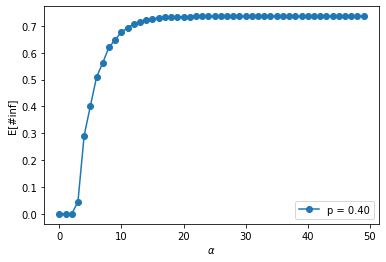

In [31]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.4]]
for y in z:
    plt.plot(alphavals, y, 'o-')

plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
#ax.set_title('Montgomery county network')
plt.legend(legend)
#plt.savefig('out/montgomery_p0.0435.png')

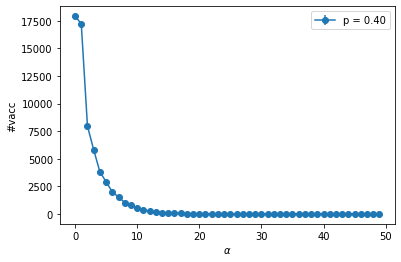

In [79]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.4]]

plt.errorbar(alphavals, vacc_mean, vacc_std, fmt='o-')

plt.xlabel(r'$\alpha$')
plt.ylabel('#vacc')
#ax.set_title('Montgomery county network')
plt.legend(legend)
plt.savefig('2_1_p4.pdf')

In [33]:
max([G.degree(v) for v in G.nodes()])

78

In [68]:
def compare_degree(s1):
    a = [i[1] for i in s1.degree()]
    a2 = collections.Counter(a)
    a2v = list(a2.values())
    
    
    plt.xlim(0,210)
    plt.bar(a2.keys(), np.log(a2v), width = 1)
    plt.xlabel("d"); plt.ylabel("log(Frequency)")
    plt.title("Vaccinated nodes degree distribution")
    plt.savefig('degree_dist_vacc_NE.pdf')
    plt.show()

def compare_cc(s1):
    a = [round(i,2) for i in nx.clustering(s1).values()]   #Round to 0.01,0.02,etc.
    a2 = collections.Counter(a)
    a2v = list(a2.values())
    plt.bar(a2.keys(), np.log(a2v),width=0.01)
    plt.xlabel("Clustering Coefficient"); plt.ylabel("log(Frequency)")
    plt.title("Vaccinated nodes clustering coefficient")
    plt.savefig('cc_dist_vacc_NE.pdf')
    plt.show()



In [29]:
import collections
from util import *
from strategy_vector_manipulator import *

v10 = set(get_provax(xx[0]))
heh1 = G.subgraph(v10)
compare_degree(heh1)
compare_cc(heh1)



NameError: name 'xx' is not defined

[899, 691, 733, 817, 1236, 344, 962, 469, 107, 148, 1033, 1651, 534, 624, 167, 311, 820, 473, 246, 431, 392, 547, 439, 83, 67, 645, 227, 862, 230, 312, 104, 45, 26, 50, 112, 129, 39, 32, 75, 345, 190, 22, 15, 62, 3, 9, 22, 10, 2, 23, 7, 11, 15, 2, 39, 4, 1, 4, 5, 1, 3, 2, 2, 2, 1, 3, 2, 1]


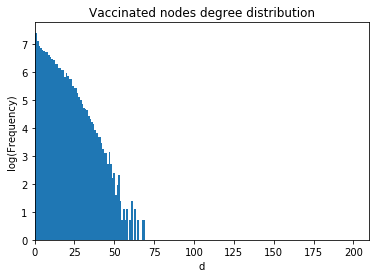

In [36]:
compare_degree(G)
plt.savefig('degree_dist_vacc_NE.pdf')

In [37]:
import pandas as pd

df = pd.read_csv('Albe_demographics.csv')

In [38]:
df['pid'] = df['pid'].astype(str)

In [39]:
attrs = df.set_index('pid').to_dict('index')

In [40]:
nx.set_node_attributes(G, attrs)

<BarContainer object of 10 artists>

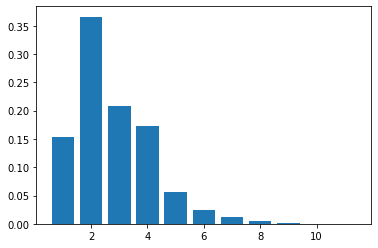

In [41]:
hhs = nx.get_node_attributes(G, 'hh_size')

count = {}

for u in G.nodes:
    if hhs[u] not in count:
        count[hhs[u]] = 0
    count[hhs[u]] += 1

y = np.array(list(count.values()))/len(G.nodes)
    
plt.bar(count.keys(),  y)

## plot for the whole graph

In [42]:
hhs = nx.get_node_attributes(G, 'hh_size')

hh_count = {}
for x in xx:
    for u in x.keys():
        if(x[u] == 1):
            if hhs[u] not in hh_count.keys():
                hh_count[hhs[u]] = 1
            else:
                hh_count[hhs[u]] += 1
        
    

In [43]:
for i in hh_count:
    hh_count[i] /= len(xx)

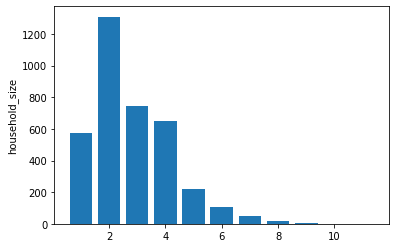

In [80]:
keys = hh_count.keys()
values = hh_count.values()

plt.bar(keys, values)
plt.ylabel('household_size')
plt.savefig('hist_household_size_vacc_NE.pdf')

In [45]:
ag = nx.get_node_attributes(G, 'age_group')
# ag

In [46]:
ag = nx.get_node_attributes(G, 'age_group')

ag_count = {}
for x in xlist_alpha[10]:
    for u in x.keys():
        if(x[u] == 1):
            if ag[u] not in ag_count:
                ag_count[ag[u]] = 1
            else:
                ag_count[ag[u]] += 1

dict_keys(['a', 'o', 'g', 's', 'p'])


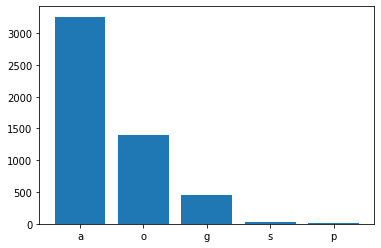

In [71]:
keys = ag_count.keys()
values = ag_count.values()

print(keys)

plt.bar(keys, values)


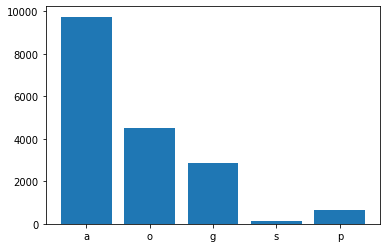

In [72]:
ag = nx.get_node_attributes(G, 'age_group')

count = {}

for u in G.nodes:
    if(u not in ag):
        continue
    if ag[u] not in count:
        count[ag[u]] = 0
    count[ag[u]] += 1

plt.bar(count.keys(), count.values())
plt.savefig('hist_age_group_vacc_NE.pdf')

In [49]:
len(G.nodes)

17920

In [73]:
hhi = nx.get_node_attributes(G, 'hh_income')


income = []
for x in xx:
    for u in x.keys():
        if( u in hhi.keys() and x[u] == 1):
            income.append(hhi[u])
    

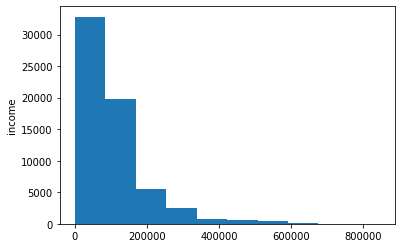

In [81]:
plt.hist(income)
plt.ylabel('income')
plt.savefig('hist_income_vacc_NE.pdf')

(array([9.679e+03, 5.458e+03, 1.540e+03, 6.560e+02, 2.300e+02, 1.470e+02,
        1.460e+02, 4.900e+01, 1.400e+01, 1.000e+00]),
 array([     0.,  84600., 169200., 253800., 338400., 423000., 507600.,
        592200., 676800., 761400., 846000.]),
 <a list of 10 Patch objects>)

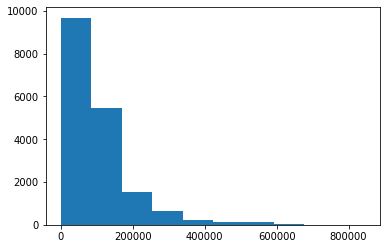

In [53]:
plt.hist([hhi[i] for i in hhi])

In [54]:
es = nx.get_node_attributes(G, 'employment_status')


employ = []
for x in xx:
    for u in x.keys():
        if( u in es.keys() and x[u] == 1):
            employ.append(es[u])

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


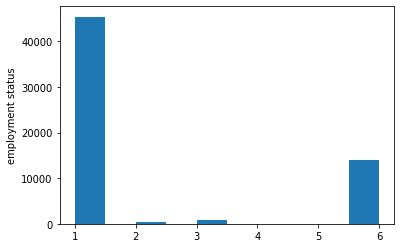

In [82]:
plt.hist(employ)
plt.ylabel('employment status')

plt.savefig('hist_employment_status_NE.pdf')

(array([11787.,     0.,   163.,     0.,   315.,     0.,    23.,     0.,
            0.,  4880.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

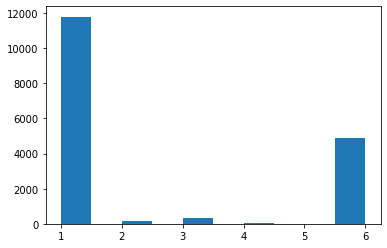

In [56]:
plt.hist([es[i] for i in es])